In [1]:
import io
import pandas as pd
import numpy as np

from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.book import *
import math
from collections import Counter
import re, string
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from imageio import imread
from nltk import sentiment

import networkx as nx

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [16]:
df = pd.read_csv("MovieSummaries/character.metadata.tsv", sep="\t", header=None)
df_movies = pd.read_csv("MovieSummaries/movie.metadata.tsv", sep="\t", encoding = 'utf8')

In [17]:
df = pd.DataFrame(
    np.row_stack([df.columns, df.values]),
    columns=['Wikipedia_movie_ID',
             'Freebase_movie_ID',
             'Movie_release_date',
             'Character_name',
             'Actor_DOB',
             'Actor_gender',
             'Actor_height',
             'Actor_ethnicity',
             'Actor_name',
             'Actor_age_at_movie_release',
             'Freebase_character_map',
             'Do_not_know_1',
             'Do_not_know_2'
            ]
)


#             'Movie_box_office_revenue',
 #            'Movie_runtime',
  #           'Movie_languages',
   #          'Movie_countries',
    #         'Movie_genres'

In [18]:
df_movies = pd.DataFrame(
    np.row_stack([df_movies.columns, df_movies.values]),
    columns=['Wikipedia_movie_ID',
             'Freebase_movie_ID',
             'Movie_name',
             'Movie_release_date',
             'Movie_box_office_revenue',
             'Movie_runtime',
             'Movie_languages',
             'Movie_countries',
             'Movie_genres'
            ]
)

In [5]:
#df_movies

In [6]:
moviePlots = io.open("MovieSummaries/plot_summaries.txt", encoding = 'utf8').read()

In [7]:
moviePlots= moviePlots.split(sep='\n')

In [8]:
len(moviePlots)

42307

In [9]:
movieDict = {}

for movie in moviePlots:
    words = movie.split(sep='\t')
    if(len(words) > 1):
        movieDict[words[0]] = words[1:]

In [10]:
len(movieDict)

42306

In [11]:
IMDbMovies = pd.read_csv("IMDb/clean_data.tsv", sep="\t", encoding = 'iso8859_2')#, dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object, "endYear": object, "runtimeMinutes": object, "genres": object})

In [12]:
#IMDbMovies

In [13]:
IMDbMoviesFilter = IMDbMovies['titleType']=="movie"
IMDbMovies = IMDbMovies[IMDbMoviesFilter]
len(IMDbMovies)

114415

In [13]:
recentYears = list(map(str, range(2012,2019)))

In [14]:
#f = open("IMDb/clean_data.tsv", "w")

In [15]:
#f.write("tconst	titleType \t primaryTitle \t originalTitle \t isAdult \t startYear \t endYear \t runtimeMinutes \t genres \n")

In [16]:
#for index, row in IMDbMovies.iterrows():
#    for cols in IMDbMovies.columns:
#        f.write(row[cols] + "\t")
#    f.write("\n")

In [17]:
#f.close()

In [11]:
import urllib.request
import json
import unidecode

In [12]:

wikiResponses = {}

In [20]:
# DONT RUN THIS


#plotSum = open("MovieSummaries/TMDBSummariesNONONO.txt", 'w')
#count = 0

#for movieDetails in IMDbMovies.get_values():
#    count +=1
#    if count % 500==0:
#        print(count)
#    #print(movieDetails)
#    
#    movieName = movieDetails[1]
#    
#    movieGenres = movieDetails[7]
#    
#    title =movieName
#    #print(title)#
#
#    dectitle = unidecode.unidecode(title)
#
#    #print(title)
#    title = dectitle.replace(" ", "+")
#
#   baseurl = "https://api.themoviedb.org/3/search/movie?api_key=03b7f051102a1a062a8b6ada9fdbd587&query="
#    #action = "action=&query="
#    title = f"{title}"
#    #content = "prop=revisions&rvprop=content&"
#    #dataformat = "format=json"
#
#    query = "%s%s" % (baseurl,title)
#    try:
#        response2 = urllib.request.urlopen(query)
#    except:
#        continue
#    data2 = response2.read()
#    details = json.loads(data2)
#    
#    if len(details['results']) > 0:
#        if 'overview' in details['results'][0].keys():
#            plotSum.write(dectitle +  "\t" + unidecode.unidecode(details['results'][0]['overview']) +"\t"+ movieGenres + "\n")
            #wikiResponses[movieName] = details['results'][0]['overview']


In [21]:
len(wikiResponses.keys())

0

In [22]:
title ="Queen"
#print(title)

title = unidecode.unidecode(title)

#print(title)
title = title.replace(" ", "_")

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query&"
title = f"titles={title}&"
content = "prop=revisions&rvprop=content&"
dataformat = "format=json"

query = "%s%s%s%s%s" % (baseurl,action,title,content,dataformat)

response2 = urllib.request.urlopen(query)
data2 = response2.read()
details = json.loads(data2)

wikiResponses += details["query"]    

TypeError: unsupported operand type(s) for +=: 'dict' and 'dict'

In [ ]:
#details["query"]["pages"]

In [ ]:
https://api.themoviedb.org/3/search/movie?api_key={api_key}&query=Jack+Reacher


In [ ]:
title ="Queen"
#print(title)

title = unidecode.unidecode(title)

#print(title)
title = title.replace(" ", "+")

baseurl = "https://api.themoviedb.org/3/search/movie?api_key=03b7f051102a1a062a8b6ada9fdbd587&query="
#action = "action=&query="
title = f"{title}"
#content = "prop=revisions&rvprop=content&"
#dataformat = "format=json"

query = "%s%s" % (baseurl,title)

response2 = urllib.request.urlopen(query)
data2 = response2.read()
details = json.loads(data2)

queenResponse = details    

In [ ]:
response2 = urllib.request.urlopen("https://api.themoviedb.org/3/search/movie?api_key=03b7f051102a1a062a8b6ada9fdbd587&query=Jack+Reacher")

In [ ]:
len(queenResponse['results'])#[0]['overview']

In [ ]:
'overview' in queenResponse['results'][0].keys()

## Word Clouds

One way of checking the similarity between movies, is with the use of word clouds. Word clouds shows the most common words within a given text. In this notebook, two different word clouds for old and new movie summaries given a specific genre can be compared. If many of same words occurs in the two word clouds, it may indicate that the given genre have not changed much over time.

First all the movie plots/summaries are loaded into variables so that *moviePlots* contains the old movie summaries, and *moviePlotsTMDB* contains the new movie summaries.

In [13]:
moviePlots = io.open("MovieSummaries/plot_summaries.txt", encoding = 'utf8').read()
moviePlots= moviePlots.split(sep='\n')

In [14]:
moviePlotsTMDB = io.open("MovieSummaries/TMDBSummaries.txt", encoding = 'utf8').read()
moviePlotsTMDB= moviePlotsTMDB.split(sep='\n')

In [19]:
l = df_movies['Movie_genres']

Each unique genre for the movies are stored in lists. 

In [20]:
uniqueGenres = []
genreDict = {}
count = 0
regex = "{?\"\/m\/\w*\": "
for element in l:
    g = element.split(", ")
    clean = []
    for genres in g:
        d = re.sub(regex,"",genres)
        d = re.sub("\"","",d)
        d = re.sub("{","",d)
        d = re.sub("}","",d)
        
        if(not d in uniqueGenres):
            uniqueGenres.append(d)
        
        clean.append(d)
    genreDict[str(df_movies['Wikipedia_movie_ID'][count])] = clean
    count += 1

In [21]:
newGenreDict = {}
new_unique_genres = []
for movies in moviePlotsTMDB:
    movie = movies.split(sep='\t')
    if len(movie)==3:
        genres = movie[2].split(sep=',')
        for g in genres:
            if not g in new_unique_genres:
                new_unique_genres.append(g)
            if g in newGenreDict.keys():
                newGenreDict[g].append(movie[1])
            else:
                newGenreDict[g] = [movie[1]]

In [22]:
shared_genres = []

for genre in new_unique_genres:
    if genre=="Adult":
        continue
    if genre in uniqueGenres:
        shared_genres.append(genre)

In order to access the genre summaries independently, the summaries are stored in seperate files with the corresponding genre.

In [23]:
#Commented out since it should only be run once

#Read the files and put all tweets into one large file
#for mID, genres in genreDict.items():
#    for g in genres:
#        try:
#            if(str(mID) in movieDict):
#                filename = "OldGenreSummaries/"+g+".txt" 
#                f = open(filename,"a", encoding='utf-8')
#                f.write(str(movieDict[mID]) + " ")
#                #print(g)
#                #print(movieDict[mID])
#                f.close()

#        except Exception:
#             continue

In [24]:
#Commented out since it should only be run once

#for genre, summary in newGenreDict.items():
#    try:
#       filename = "NewGenreSummaries/"+genre+".txt"
#        f = open(filename, "a", encoding ='utf-8')
#        for s in summary:
#            f.write(s + " ")
#        f.close()
        
#    except Exception:
#        continue
    

The summaries of each genre is read from the files and are used as the input for the *TF-IDF*.

In [25]:
old_docs=[]
old_genreNumbers = {}
count = 0
for g in shared_genres:
        try: 
            filename = "OldGenreSummaries/"+g+".txt" 
            f = io.open(filename, encoding = 'utf8').read()
            old_docs.append(f)
            old_genreNumbers[g]=count
            count +=1
        except Exception:
             continue

The build in TF-IDF calculator from sklearn is used to find the TF-IDF of each word for the given genres. This is later used when the word clouds are generated.

TF-IDF is short for *term frequency–inverse document frequency* and is used to reflect the importance of different words in a given document in a collection of documents. The TF-IDF value for a given word increases proportionally to the amount of times the word occurs in the document. This is given by the TF part of TF-IDF. TF is short for *term frequency* and is calculated as:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

The second term IDF is short for *inverse document frequency* whcich is necessary to account for the fact that some words, such as "the", "of", and "a", generally appear more frequently than other words. IDF is calculated as:

IDF(t) = log(Total number of documents / Number of documents that contains term t)

Finally TF-IDF is calculated as:

TF-IDF(T) = TF(t) * IDF(t) [1]


In [26]:
# settings that you use for count vectorizer will go here
old_tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words = set(stopwords.words('english')))
 
# just send in all your docs here
old_tfidf_vectorizer_vectors=old_tfidf_vectorizer.fit_transform(old_docs)

To see the word cloud for another genre, simply change genre from "Action" to "some genre" in the code below, where *some genre* can be almost any given genre. The genre is initially set to "Action" which will be used as the running example for the remainder of the word cloud section.

In [54]:
#genre = "Action"
#genre = "Adventure"
genre = "Animation"
#genre = "Biography"
#genre = "Comedy"
#genre = "Crime"
#genre = "Documentary"
#genre = "Drama"
#genre = "Fantasy"
#genre = "History"
#genre = "Horror"
#genre = "Music"
#genre = "Musical"
#genre = "Mystery"
#genre = "News"
#genre = "Thriller"
#genre = "Western"

In [55]:
old_vector_tfidfvectorizer=old_tfidf_vectorizer_vectors[old_genreNumbers[genre]] 
# place tf-idf values in a pandas data frame
old_action_idf = pd.DataFrame(old_vector_tfidfvectorizer.T.todense()*100, index=old_tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
#action_idf.sort_values(by=["tfidf"],ascending=False)

The code below makes a string which contains the individual words multiple times based on the TF-IDF value of that word. So if a word has a high TF-IDF value it occurs more often in the string than a word with a lower TF-IDF value.

In [56]:
old_action_tf_idf_string = ""
count = 0
for w in old_action_idf.index:
    for i in range(1,int(old_action_idf.values[count])):
        old_action_tf_idf_string += w + " "
    count += 1

 The word cloud below shows the word cloud for old movies of the given genre.

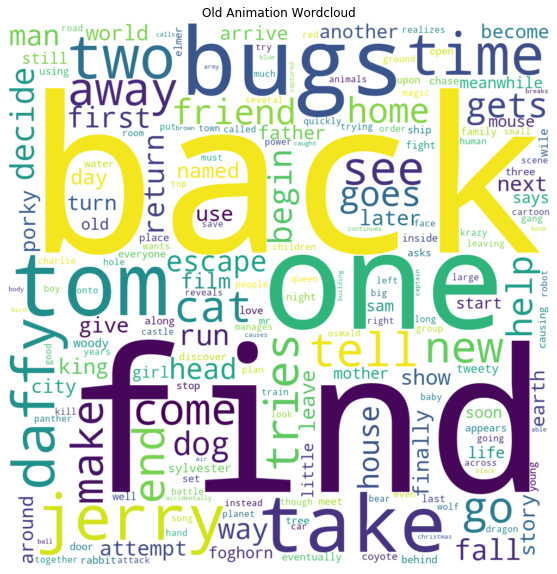

In [57]:
old_action_wc = WordCloud(background_color="white", width=1000, height=1000, collocations=False).generate(old_action_tf_idf_string)
plt.figure(3,figsize=(10,10))
plt.title("Old " + genre + " Wordcloud")
plt.imshow(old_action_wc, interpolation="bilinear")
plt.margins(x=0, y=0)
plt.axis("off")
plt.show()

Now the same process is done for new movies to make the word cloud.

In [58]:
new_docs=[]
new_genreNumbers = {}
count = 0
for g in shared_genres:
        try: 
            filename = "NewGenreSummaries/"+g+".txt" 
            f = io.open(filename, encoding = 'utf8').read()
            new_docs.append(f)
            new_genreNumbers[g]=count
            count +=1
        except Exception:
             continue

In [59]:
# settings that you use for count vectorizer will go here
new_tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words = set(stopwords.words('english')))
 
# just send in all your docs here
new_tfidf_vectorizer_vectors=new_tfidf_vectorizer.fit_transform(new_docs)

In [60]:
new_vector_tfidfvectorizer=new_tfidf_vectorizer_vectors[new_genreNumbers[genre]] 
# place tf-idf values in a pandas data frame
new_action_idf = pd.DataFrame(new_vector_tfidfvectorizer.T.todense()*100, index=new_tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
#action_idf.sort_values(by=["tfidf"],ascending=False)

In [61]:
new_action_tf_idf_string = ""
count = 0
for w in new_action_idf.index:
    for i in range(1,int(new_action_idf.values[count])):
        new_action_tf_idf_string += w + " "
    count += 1

The word cloud for new action movies can be seen below.

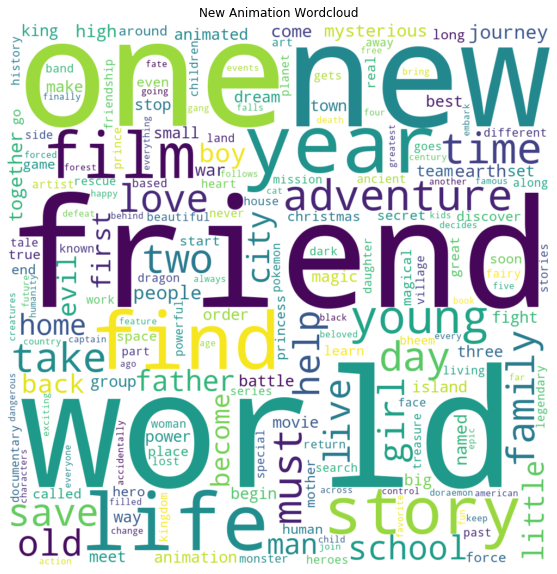

In [62]:
new_action_wc = WordCloud(background_color="white", width=1000, height=1000, collocations=False).generate(new_action_tf_idf_string)
plt.figure(3,figsize=(10,10))
plt.title("New " + genre + " Wordcloud")
plt.imshow(new_action_wc, interpolation="bilinear")
plt.margins(x=0, y=0)
plt.axis("off")
plt.show()

When the old action movie word cloud and the new action word cloud is compared, one may notice that the most dominant words are present in both word clouds. These words include "one", "man", "find", "police", and so on. The fact that these word clouds share many of the same words gives some evidence that the action movies may not have changeed much over time, although more evidence is needed to make that conclusion.

## Sentiment

Another way of analyzing whether movies have changed over time is with the use of sentiment scores. With sentiment scores it is possible to determine how "happy" a text is. This is useful in this context as the sentiment scores are able to tell whether movie have become more positive or negative over time or if the happiness has changed at all. 

The sentiment scores was found using the LabMIT 1.0 worddlist which contains 10,222 unique words. These words were found by compiling word lists from four different sources: Twitter, Google Books (English), music lyrics (1960 to 2007), and the New York Times (1987 to 2007). The word lists from each of these sources were ordered by decreasing frequency of occurence. The top 5,000 words from each source were merged yielding a list of 10,222 unique words. The happiness rating of the individual words were found using Amazon's Mechanical Turk, which evaluates each word by having 50 independent users rate it on a scale of 1 to 9 based on how happy it made them feel. 1 being sad and 9 being happy. The happiness rating of a word is then the average of these 50 ratings. [2]

In [ ]:
sentimentals = open("Data_Set_S1.txt","r", encoding='utf8').read()

In [ ]:
sentimentals_lines = sentimentals.split('\n')

In [ ]:
avg_happiness_map = {}

for l in sentimentals_lines:
    h = l.split(sep='\t')
    if len(h)>1:
        try:
            avg_happiness_map[h[0]] = float(h[2])
        except Exception:
            continue

The *getAvgHappiness* function calculates the averages happiness of a list of tokens, and is later used to calculate the average happiness of the old and new movie genres.

In [ ]:
def getAvgHappiness(tokens) :
    total = 0
    for token in tokens :
        try :
            total += avg_happiness_map[token]
        except :
            total += 0
    return total / len(tokens)

The below code generates the tokens for each genre so that they could be used with the *getAvgHappiness* function. These tokens have been written into a text file for quicker access, and has thus been commented out.

The build in tokenizer from nltk has been used to tokenize the summaries from each genre. Tokenization is to separate a string into meaningfull sections. As an example the string "The slow white dog run across the field" of 39 characters could be split into 8 different tokens. The reason for this is that the string is not implicitly segmented on spaces. [3] 

In [ ]:
#Takes forever. Not necesarry since tokens have been stored in files

#old_tokens = []

#for g in shared_genres:
#    try :
#        file = open("OldGenreSummaries/"+ g + ".txt", "r", encoding="utf8").read()
#        l = file.split('\n')
#        for t in l: 
#            tokens = [w.lower() for w in nltk.word_tokenize(t) if not w in string.punctuation and not w in set(stopwords.words("english")) and not w.isdigit() and not w.startswith("//")]
#            old_tokens.append(tokens)
#    except Exception:
#        dummy=1

In [ ]:
#Not necesarry since tokens have been stored in files

#new_tokens = []

#for g in shared_genres:
#    try :
#        file = open("NewGenreSummaries/"+ g + ".txt", "r", encoding="utf8").read()
#        l = file.split('\n')
#        for t in l: 
#            tokens = [w.lower() for w in nltk.word_tokenize(t) if not w in string.punctuation and not w in set(stopwords.words("english")) and not w.isdigit() and not w.startswith("//")]
#            new_tokens.append(tokens)
#    except Exception:
#        dummy=1

In [ ]:
old_safe_tokens = old_tokens

In [ ]:
new_safe_tokens = new_tokens

In [ ]:
#Should only be run once

#for i in range(len(shared_genres)):
#    try:
#        file = open("OldGenreTokens/" + shared_genres[i] + ".txt", "a", encoding='utf8')
#        for token in old_tokens[i]:
#            file.write(token + " ")
#        file.close()
#    except Exception:
#        continue

In [ ]:
#Should only be run once

#for i in range(len(shared_genres)):
#    try:
#        file = open("NewGenreTokens/" + shared_genres[i] + ".txt", "a", encoding='utf8')
#        for token in new_tokens[i]:
#            file.write(token + " ")
#        file.close()
#    except Exception:
#        continue

In [ ]:
old_file_tokens = []
new_file_tokens = []

for i in range(len(shared_genres)):
    try:
        old_file = open("OldGenreTokens/" + shared_genres[i] + ".txt", "r", encoding='utf8').read()
        new_file = open("NewGenreTokens/" + shared_genres[i] + ".txt", "r", encoding='utf8').read()
        
        tokens_old = old_file.split(" ")
        tokens_new = new_file.split(" ")
        
        old_file_tokens.append(tokens_old)
        new_file_tokens.append(tokens_new)

    except Exception:
        continue

The previously explained function is used to find the average happiness of each genre for both the old and new movies.

In [ ]:
happinessOld = [getAvgHappiness(tokens) for tokens in old_file_tokens if getAvgHappiness(tokens) > 0]
happinessNew = [getAvgHappiness(tokens) for tokens in new_file_tokens if getAvgHappiness(tokens) > 0]

In [ ]:
genreHappinessOld = {}
genreHappinessNew = {}
for i in range(len(happinessOld)):
    genreHappinessOld[shared_genres[i]] = happinessOld[i]
    genreHappinessNew[shared_genres[i]] = happinessNew[i] 

Below the average happiness for each genre is shown. 

In [ ]:
print("| Genre | Old | New |")
for g, s in genreHappinessOld.items():
    #print("Old ", g, " Score ", s )
    #print("New ", g, " Score ", genreHappinessNew[g] )
    print("|",g,  "|" ,s, "|", genreHappinessNew[g], "|")

The average sentiment scores for each genre show that new movies generally are more happy than older movies, though only by a very small amount. There may be other reasons for the higher "happiness" scores. Since there is no significant change, the reason for the very small increase may be that the summaries were gathered from different sources, and the way of writting the summaries therefore is different.

In [ ]:
#plt.hist(happinessOld, bins=50, alpha=0.7, color="#EE3D3D", label="Old")
#plt.hist(happinessNew, bins=50, alpha=0.7, color="#3D40EE", label="New")
#plt.title("Distribution of happiness for all movies")
#plt.xlabel("Average happiness")
#plt.ylabel("Quantity")
#plt.legend()
#plt.show()

## Network

In [45]:
#Read movie title file
moviesDF = pd.read_csv("Data/IMDb/movie_titles_clean.tsv", sep="\t")

In [46]:
#Create dictionary of movie titles
movieTitles = {}

for movie in moviesDF.get_values():
    genres = []
    
    for g in movie[2].split(","):
        genres.append(g)
    
    movieTitles[movie[0]] = [movie[1], genres]

C:\Users\mads9\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  after removing the cwd from sys.path.


In [47]:
#Read movie and actor/actress file
moviesAndActorsDF = pd.read_csv("Data/IMDb/movie_and_actors_clean.tsv", sep="\t")

In [48]:
#Create dictionary of movies and actors
movieAndActors = {}

for ma in moviesAndActorsDF.get_values(): 
    movies = []
    
    for m in ma[1].split(","):
        movies.append(m)
    
    movieAndActors[ma[0]] = movies

C:\Users\mads9\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  after removing the cwd from sys.path.


In [49]:
#Init graph
G = nx.Graph()

In [50]:
#Add nodes to graph
for m in movieTitles:
    G.add_node(m, title=movieTitles[m][0], genres=movieTitles[m][1])

In [51]:
#Add edges to graph
for a in movieAndActors.keys():
    movies = movieAndActors[a]
    for i in range(len(movies)):
        for j in range(i+1,len(movies)):
            G.add_edge(movies[i],movies[j])

In [52]:
print("Total number of nodes:", G.number_of_nodes())
print("Total number of edges:", G.number_of_edges())

Total number of nodes: 527345
Total number of edges: 19461220


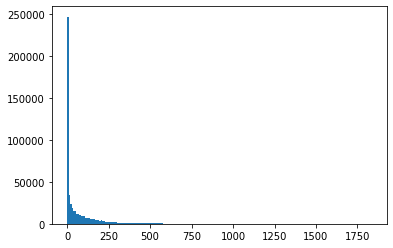

In [53]:
#Plot degree distribution
degrees = [G.degree(n) for n in G.nodes()]

plt.hist(degrees,bins=200)
plt.show()
plt.close()

## References

[1] Maklin, C. (2019). "TF IDF | TFIDF Python Example" (WEB). Towards Data Science.; https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

[2] Dodds, P. S.; Harris, K. D.; Kloumann, I. M.; Bliss, C. A.; Danforth, C. M. (2011). Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter; https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752

[3] Wikipedia, the free encyclopedia (2019), Lexical analysis; https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization 